In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

In [2]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston['ZN'] = boston_dataset.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,24.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,21.6,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,34.7,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,33.4,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,36.2,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,22.4,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,20.6,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,23.9,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,22.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [5]:
X = boston.drop(axis = 0, columns = ['ZN'])
Y = boston['ZN']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 12)
(102, 12)
(404,)
(102,)


In [7]:
X_test

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
226,0.38214,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13
292,0.03615,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70
90,0.04684,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81
373,11.10810,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77
273,0.22188,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58
...,...,...,...,...,...,...,...,...,...,...,...,...
349,0.02899,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89
212,0.21719,10.59,1.0,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03
156,2.44668,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14
480,5.82401,18.10,0.0,0.532,6.242,64.7,3.4242,24.0,666.0,20.2,396.90,10.74


# RMSprop Optimizer

RMSprop stands for Root Mean Square Propagation. It is gradient descent optimization algorithm for mini-batch learning of neural networks. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster. 

Custom step size - cust_step_size = step_size / (1e-8 + sqrt(s))

Mean squared partial derivative for one parameter - s(t+1) = (s(t) * rho) + (f'(x(t))^2 * (1.0-rho))

Custom step size update - cust_step_size(t+1) = step_size / (1e-8 + RMS(s(t+1)))

Parameter update - x(t+1) = x(t) – cust_step_size(t+1) * f'(x(t))

In [8]:
RMSmodel = models.Sequential()
RMSmodel.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
RMSmodel.add(layers.Dense(64, activation='relu'))
RMSmodel.add(layers.Dense(1))

RMSmodel.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
RMSmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [9]:
RMSmodel.fit(X_train, Y_train, epochs=80, batch_size=16, verbose=1)

Epoch 1/80
26/26 [==============================] - 1s 855us/step - loss: 230.9131 - mae: 9.9990
Epoch 2/80
26/26 [==============================] - 0s 758us/step - loss: 133.2862 - mae: 8.9229
Epoch 3/80
26/26 [==============================] - 0s 758us/step - loss: 132.7127 - mae: 8.9836
Epoch 4/80
26/26 [==============================] - 0s 798us/step - loss: 126.4004 - mae: 8.9190
Epoch 5/80
26/26 [==============================] - 0s 809us/step - loss: 114.6270 - mae: 7.6740
Epoch 6/80
26/26 [==============================] - 0s 790us/step - loss: 116.9007 - mae: 8.2049
Epoch 7/80
26/26 [==============================] - 0s 838us/step - loss: 106.8412 - mae: 7.7808
Epoch 8/80
26/26 [==============================] - 0s 878us/step - loss: 98.3880 - mae: 7.7358
Epoch 9/80
26/26 [==============================] - 0s 798us/step - loss: 98.0847 - mae: 7.6159
Epoch 10/80
26/26 [==============================] - 0s 798us/step - loss: 97.9571 - mae: 7.8848
Epoch 11/80
26/26 [=============

In [10]:
RMStest_mse_score, RMStest_mae_score = RMSmodel.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 0s/step - loss: 24.6369 - mae: 3.7839


In [11]:
print(RMStest_mse_score, RMStest_mae_score)
RMSpred = RMSmodel.predict(X_test)
print(RMSpred[0])

24.636890411376953 3.7838895320892334
[35.072598]


In [12]:
RMShistory = RMSmodel.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split = 0.2)
# evaluate the keras model
_, RMSaccuracy = RMSmodel.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (RMSaccuracy*100))

Epoch 1/100
33/33 [==============================] - 0s 2ms/step - loss: 39.2947 - mae: 4.4706 - val_loss: 39.1837 - val_mae: 4.4151
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 39.1152 - mae: 4.7604 - val_loss: 28.0880 - val_mae: 3.6150
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 33.4570 - mae: 4.1996 - val_loss: 52.7374 - val_mae: 5.3964
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 32.4067 - mae: 4.1130 - val_loss: 78.8271 - val_mae: 7.0227
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 37.3236 - mae: 4.3703 - val_loss: 38.0177 - val_mae: 4.5209
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 32.3955 - mae: 4.2388 - val_loss: 27.5864 - val_mae: 3.8820
Epoch 7/100
33/33 [==============================] - 0s 1ms/step - loss: 30.2731 - mae: 3.9996 - val_loss: 39.8492 - val_mae: 5.0230
Epoch 8/100
33/33 [==============================] - 0s 1ms/step - lo

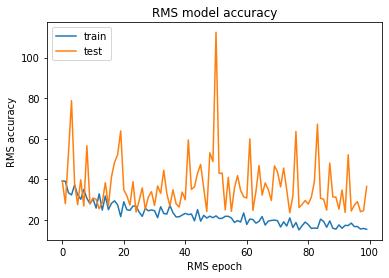

In [13]:
plt.plot(RMShistory.history['loss'])
plt.plot(RMShistory.history['val_loss'])
plt.title('RMS model accuracy')
plt.ylabel('RMS accuracy')
plt.xlabel('RMS epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Adam Optimizer

Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks. The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter. It also has advantages of Adagrad which works really well in settings with sparse gradients, but struggles in non-convex optimization of neural networks, and RMSprop, which tackles to resolve some of the problems of Adagrad and works really well in on-line settings

Gradient - g(t) = f'(x(t-1))

First moment - m(t) = beta1 * m(t-1) + (1 – beta1) * g(t)

Second Moment - v(t) = beta2 * v(t-1) + (1 – beta2) * g(t)^2

First moment bias correction, mhat(t) = m(t) / (1 – beta1(t))

Second moment bias correction, vhat(t) = v(t) / (1 – beta2(t))

Beta values,
beta1(t) = beta1^t
beta2(t) = beta2^t

Parameter value - x(t) = x(t-1) – alpha * mhat(t) / (sqrt(vhat(t)) + eps)

Re-ordering update, 
alpha(t) = alpha * sqrt(1 – beta2(t)) / (1 – beta1(t))
x(t) = x(t-1) – alpha(t) * m(t) / (sqrt(v(t)) + eps)

In [14]:
Adammodel = models.Sequential()
Adammodel.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
Adammodel.add(layers.Dense(64, activation='relu'))
Adammodel.add(layers.Dense(1))

Adammodel.compile(optimizer='adam', loss='mse', metrics=['mae'])
Adammodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                832       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [15]:
Adammodel.fit(X_train, Y_train, epochs=80, batch_size=16, verbose=1)

Epoch 1/80
26/26 [==============================] - 0s 901us/step - loss: 232.9628 - mae: 11.4791
Epoch 2/80
26/26 [==============================] - 0s 918us/step - loss: 97.2306 - mae: 7.5028
Epoch 3/80
26/26 [==============================] - 0s 838us/step - loss: 79.2658 - mae: 6.4701
Epoch 4/80
26/26 [==============================] - 0s 829us/step - loss: 71.7776 - mae: 5.9367
Epoch 5/80
26/26 [==============================] - 0s 798us/step - loss: 70.8203 - mae: 6.0406
Epoch 6/80
26/26 [==============================] - 0s 915us/step - loss: 77.3792 - mae: 6.4352
Epoch 7/80
26/26 [==============================] - 0s 878us/step - loss: 63.2901 - mae: 5.4485
Epoch 8/80
26/26 [==============================] - 0s 818us/step - loss: 61.8829 - mae: 5.5797
Epoch 9/80
26/26 [==============================] - 0s 836us/step - loss: 61.3144 - mae: 5.5568
Epoch 10/80
26/26 [==============================] - 0s 838us/step - loss: 56.4315 - mae: 5.1280
Epoch 11/80
26/26 [==================

In [16]:
Adamtest_mse_score, Adamtest_mae_score = Adammodel.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 5ms/step - loss: 42.5311 - mae: 4.9959


In [17]:
print(Adamtest_mse_score, Adamtest_mae_score)
Adampred = Adammodel.predict(X_test)
print(Adampred[0])

42.53111267089844 4.995858192443848
[30.136189]


In [18]:
Adamhistory = Adammodel.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split = 0.2)
_, Adamaccuracy = Adammodel.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (Adamaccuracy*100))

Epoch 1/100
33/33 [==============================] - 0s 2ms/step - loss: 38.1117 - mae: 4.5130 - val_loss: 25.9224 - val_mae: 3.6042
Epoch 2/100
33/33 [==============================] - 0s 1ms/step - loss: 28.1526 - mae: 3.8396 - val_loss: 29.0451 - val_mae: 3.8299
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 36.4360 - mae: 4.4532 - val_loss: 29.5153 - val_mae: 3.8585
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 34.0310 - mae: 4.2182 - val_loss: 39.1514 - val_mae: 5.3063
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 33.5212 - mae: 4.2576 - val_loss: 54.4326 - val_mae: 5.7031
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 41.7470 - mae: 4.8790 - val_loss: 26.1321 - val_mae: 3.9364
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 34.2133 - mae: 4.5077 - val_loss: 25.9708 - val_mae: 3.6397
Epoch 8/100
33/33 [==============================] - 0s 2ms/step - lo

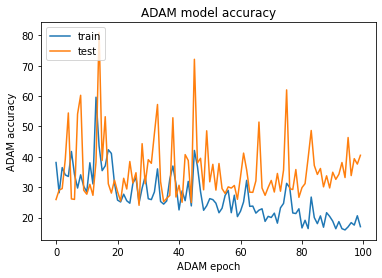

In [19]:
plt.plot(Adamhistory.history['loss'])
plt.plot(Adamhistory.history['val_loss'])
plt.title('ADAM model accuracy')
plt.ylabel('ADAM accuracy')
plt.xlabel('ADAM epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

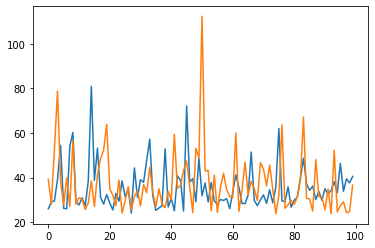

In [20]:
plt.plot(Adamhistory.history['val_loss'])
plt.plot(RMShistory.history['val_loss'])
plt.show()

# Batch Normalization

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. It normalises a layer input by subtracting the mini-batch mean and dividing it by the mini-batch standard deviation. Batch normalization accelerates training, in some cases by halving the epochs or better, and provides some regularization, reducing generalization error.

In [21]:
from keras.layers import BatchNormalization
from sklearn.metrics import mean_squared_error

In [22]:
Normmodel = Sequential()
Normmodel.add(Dense(12, input_dim=12, activation='relu'))
Normmodel.add(Dense(8, activation='relu'))
Normmodel.add(BatchNormalization())
Normmodel.add(Dense(1, activation='sigmoid'))

Normmodel.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [23]:
Normmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 batch_normalization (BatchN  (None, 8)                32        
 ormalization)                                                   
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 301
Trainable params: 285
Non-trainable params: 16
_________________________________________________________________


In [24]:
Normhistory = Normmodel.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split = 0.2)
# evaluate the keras model
_, Normaccuracy = Normmodel.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (Normaccuracy*100))

Epoch 1/100
33/33 [==============================] - 1s 5ms/step - loss: -3.0994 - accuracy: 0.0000e+00 - val_loss: 93.4543 - val_accuracy: 0.0000e+00
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: -10.3334 - accuracy: 0.0000e+00 - val_loss: 37.1875 - val_accuracy: 0.0000e+00
Epoch 3/100
33/33 [==============================] - 0s 1ms/step - loss: -17.2955 - accuracy: 0.0000e+00 - val_loss: 12.8401 - val_accuracy: 0.0000e+00
Epoch 4/100
33/33 [==============================] - 0s 1ms/step - loss: -23.2858 - accuracy: 0.0000e+00 - val_loss: -10.3436 - val_accuracy: 0.0000e+00
Epoch 5/100
33/33 [==============================] - 0s 1ms/step - loss: -28.5359 - accuracy: 0.0000e+00 - val_loss: -19.3090 - val_accuracy: 0.0000e+00
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: -38.2512 - accuracy: 0.0000e+00 - val_loss: -26.3905 - val_accuracy: 0.0000e+00
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: -45.3935 - ac

In [25]:
Normpredictions = Normmodel.predict(X_test)
Normpredictions = (Normmodel.predict(X_test) > 0.5).astype(int)
print(mean_squared_error(Y_test, Normpredictions))

525.1436274509805


# Dropout

Dropout is a regularization techinque used to prevent overfitting. A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to over-fitting of training data

In [26]:
from keras.layers import Dropout

In [27]:
drpmodel = Sequential()
drpmodel.add(Dense(12, input_dim=12, activation='relu'))
drpmodel.add(Dense(8, activation='relu'))
drpmodel.add(Dropout(0.1))
drpmodel.add(Dense(1, activation='sigmoid'))

drpmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
drpmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                156       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [29]:
drphistory = drpmodel.fit(X_train, Y_train, epochs=100, batch_size=10, validation_split = 0.2)
_, drpaccuracy = drpmodel.evaluate(X_test, Y_test)

print('Accuracy: %.2f' % (drpaccuracy*100))

Epoch 1/100
33/33 [==============================] - 1s 5ms/step - loss: -7944.2485 - accuracy: 0.0000e+00 - val_loss: -10282.4248 - val_accuracy: 0.0000e+00
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: -12478.0752 - accuracy: 0.0000e+00 - val_loss: -15597.9912 - val_accuracy: 0.0000e+00
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: -18465.0234 - accuracy: 0.0000e+00 - val_loss: -22714.2617 - val_accuracy: 0.0000e+00
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: -26372.9629 - accuracy: 0.0000e+00 - val_loss: -32306.6797 - val_accuracy: 0.0000e+00
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: -37070.4570 - accuracy: 0.0000e+00 - val_loss: -44742.6992 - val_accuracy: 0.0000e+00
Epoch 6/100
33/33 [==============================] - 0s 1ms/step - loss: -50522.9219 - accuracy: 0.0000e+00 - val_loss: -60294.2031 - val_accuracy: 0.0000e+00
Epoch 7/100
33/33 [============================

In [30]:
drppredictions = drpmodel.predict(X_test)
drppredictions = (drpmodel.predict(X_test) > 0.5).astype(float)
print(mean_squared_error(Y_test, drppredictions))

522.718137254902
